In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import re

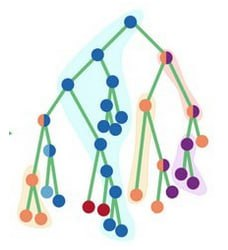

In [2]:
mut_alleles = pd.read_csv('../data_obtain/allel_mutspec_12comp.csv', index_col = 0)

In [3]:
mut_alleles

,allel,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,sum_mutations
0,3884Leu,0.022140,0.059963,0.007380,0.012915,0.000000,0.299815,0.063653,0.000000,0.121771,0.005535,0.308118,0.098708,1084
0,5006Tyr,0.011538,0.038462,0.011538,0.015385,0.007692,0.288462,0.134615,0.007692,0.069231,0.000000,0.384615,0.030769,260
0,6773Met,0.003442,0.058520,0.013769,0.001721,0.000000,0.383821,0.048193,0.000000,0.041308,0.008606,0.409639,0.030981,581
0,5489Tyr,0.009881,0.052372,0.012846,0.009881,0.004941,0.326087,0.061265,0.005929,0.103755,0.021739,0.321146,0.070158,1012
0,5064Ser,0.007435,0.111524,0.014870,0.007435,0.000000,0.427509,0.055762,0.003717,0.011152,0.014870,0.323420,0.022305,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4620Leu,0.006657,0.068452,0.012140,0.006187,0.000940,0.377976,0.069706,0.000940,0.035479,0.011200,0.377193,0.033130,12768
0,4620Leu,0.008230,0.076132,0.008230,0.008230,0.000000,0.341564,0.082305,0.000000,0.020576,0.030864,0.407407,0.016461,486
0,4620Leu,0.007722,0.092664,0.000000,0.011583,0.000000,0.335907,0.077220,0.000000,0.042471,0.007722,0.382239,0.042471,259
0,4620Leu,0.008889,0.053333,0.017778,0.000000,0.000000,0.422222,0.053333,0.000000,0.062222,0.013333,0.333333,0.035556,225


In [4]:
mut_alleles.head()

,allel,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,sum_mutations
0,3884Leu,0.022140,0.059963,0.007380,0.012915,0.000000,0.299815,0.063653,0.000000,0.121771,0.005535,0.308118,0.098708,1084
0,5006Tyr,0.011538,0.038462,0.011538,0.015385,0.007692,0.288462,0.134615,0.007692,0.069231,0.000000,0.384615,0.030769,260
0,6773Met,0.003442,0.058520,0.013769,0.001721,0.000000,0.383821,0.048193,0.000000,0.041308,0.008606,0.409639,0.030981,581
0,5489Tyr,0.009881,0.052372,0.012846,0.009881,0.004941,0.326087,0.061265,0.005929,0.103755,0.021739,0.321146,0.070158,1012
0,5064Ser,0.007435,0.111524,0.014870,0.007435,0.000000,0.427509,0.055762,0.003717,0.011152,0.014870,0.323420,0.022305,269


In [6]:
mut_alleles['al_stnum'] = mut_alleles['allel'].astype(str)

## Compare allel mutspecs with general

In [7]:
mut_general = pd.read_csv('../data/u_mutation_dists.filtered.csv', index_col=0)

C:\Users\voron\AppData\Local\Temp\ipykernel_7624\2738904014.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  mut_general = pd.read_csv('../data/u_mutation_dists.filtered.csv', index_col=0)


In [8]:
mut_general.head()

,mut_id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,topology_dist,GenName,CodonNumber,NucInCodon,RefCodon,AltCodon,NeighL,NeighR,RefAa,AltAa,AaSub
0,0,1087,G,A,gtGtt,gtAtt,#54520#,#54519#,0,ORF1ab,274.0,3,GUG,GUA,U,U,Val,Val,FF
1,1,3677,U,C,atTtt,atCtt,#54520#,#54519#,0,ORF1ab,1138.0,1,UUU,CUU,U,U,Phe,Leu,NS
2,2,7119,C,U,ttCta,ttTta,#54520#,#54519#,0,ORF1ab,2285.0,2,UCU,UUU,U,U,Ser,Phe,NS
3,3,9565,C,U,ttCtt,ttTtt,#54520#,#54519#,0,ORF1ab,3100.0,3,UUC,UUU,U,U,Phe,Phe,S
4,4,10323,A,G,taAgg,taGgg,#54520#,#54519#,0,ORF1ab,3353.0,2,AAG,AGG,A,A,Lys,Arg,NS


In [9]:
mut_general = mut_general[mut_general['AaSub'].isin(['S', 'FF'])]

I will take only synonimus mutations

In [10]:
mut_general['mut'] = mut_general['parent_nucl'] + '>' + mut_general['child_nucl']

In [11]:
general_mutspec = mut_general.groupby(['mut'])['GenName'].count().to_frame(name=None)

C:\Users\voron\AppData\Local\Temp\ipykernel_7624\1667529630.py:1: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  general_mutspec = mut_general.groupby(['mut'])['GenName'].count().to_frame(name=None)


In [12]:
general_mutspec['GenName'] = general_mutspec['GenName']/sum(general_mutspec['GenName'])

In [13]:
general_mutspec = general_mutspec.pivot_table(columns='mut')

In [14]:
general_mutspec

mut,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G
GenName,0.008198,0.069146,0.014248,0.007946,0.002323,0.365974,0.070929,0.002269,0.040591,0.0135,0.368554,0.036323


In [18]:
df_for_dendro = mut_alleles.drop(['allel', 'sum_mutations'],axis=1)
df_for_dendro.head()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
0,0.022140,0.059963,0.007380,0.012915,0.000000,0.299815,0.063653,0.000000,0.121771,0.005535,0.308118,0.098708,3884Leu
0,0.011538,0.038462,0.011538,0.015385,0.007692,0.288462,0.134615,0.007692,0.069231,0.000000,0.384615,0.030769,5006Tyr
0,0.003442,0.058520,0.013769,0.001721,0.000000,0.383821,0.048193,0.000000,0.041308,0.008606,0.409639,0.030981,6773Met
0,0.009881,0.052372,0.012846,0.009881,0.004941,0.326087,0.061265,0.005929,0.103755,0.021739,0.321146,0.070158,5489Tyr
0,0.007435,0.111524,0.014870,0.007435,0.000000,0.427509,0.055762,0.003717,0.011152,0.014870,0.323420,0.022305,5064Ser


In [19]:
general_mutspec = general_mutspec.reset_index(drop=True)
general_mutspec = general_mutspec.rename_axis(None, axis=1)
general_mutspec['al_stnum'] = 1
general_mutspec.head()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
0,0.008198,0.069146,0.014248,0.007946,0.002323,0.365974,0.070929,0.002269,0.040591,0.0135,0.368554,0.036323,1


In [20]:
df_for_dendro = df_for_dendro.append(general_mutspec, ignore_index = True)

C:\Users\voron\AppData\Local\Temp\ipykernel_7624\3235207286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_for_dendro = df_for_dendro.append(general_mutspec, ignore_index = True)


In [21]:
df_for_dendro.tail()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
164,0.008230,0.076132,0.008230,0.008230,0.000000,0.341564,0.082305,0.000000,0.020576,0.030864,0.407407,0.016461,4620Leu
165,0.007722,0.092664,0.000000,0.011583,0.000000,0.335907,0.077220,0.000000,0.042471,0.007722,0.382239,0.042471,4620Leu
166,0.008889,0.053333,0.017778,0.000000,0.000000,0.422222,0.053333,0.000000,0.062222,0.013333,0.333333,0.035556,4620Leu
167,0.002469,0.054321,0.061728,0.004938,0.000000,0.303704,0.044444,0.000000,0.116049,0.022222,0.286420,0.103704,6819Ile
168,0.008198,0.069146,0.014248,0.007946,0.002323,0.365974,0.070929,0.002269,0.040591,0.013500,0.368554,0.036323,1


In [22]:
pca_only = df_for_dendro
pca_only.loc[pca_only['al_stnum'] != 1,'al_stnum'] = 0

In [23]:
allel_char = pca_only['al_stnum']
pca_data_only = pca_only.drop('al_stnum', axis=1)

In [24]:
pca = PCA()
pca_data = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])

In [25]:
pca_data1 = pca_data[["pc1","pc2"]].copy()

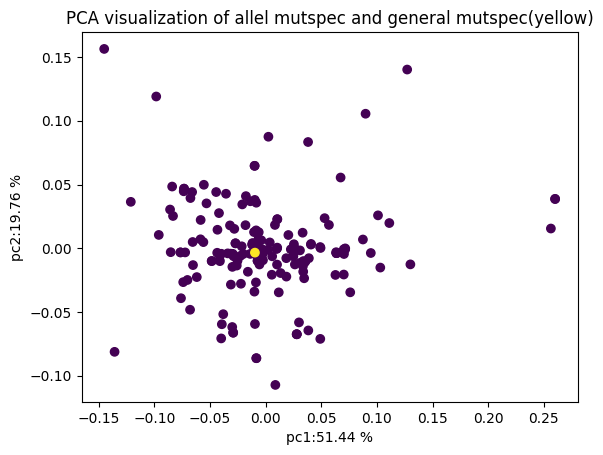

In [26]:
plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=pca_only.al_stnum)
plt.title("PCA visualization of allel mutspec and general mutspec(yellow)")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

<Figure size 1500x800 with 0 Axes>

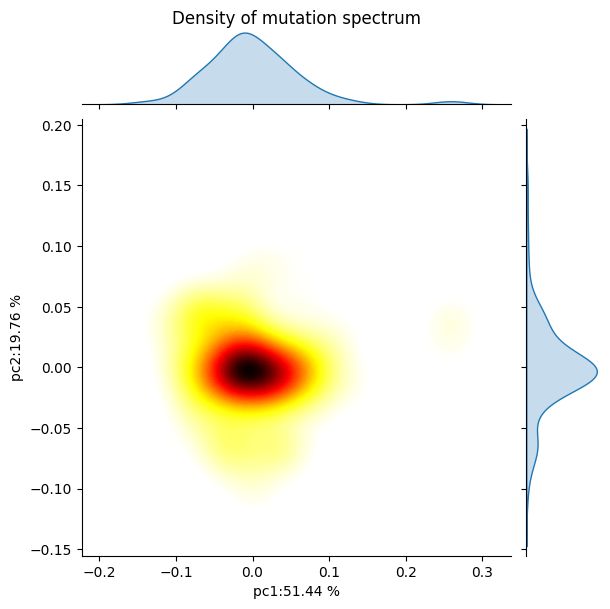

In [27]:
plt.figure(figsize=(15,8))
sns.jointplot(x=pca_data1["pc1"], y=pca_data1["pc2"], kind='kde', cmap='hot_r', n_levels=100, fill=True)
plt.title("Density of mutation spectrum", x=0.5, y=1.2)
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

## Color by subgenes

In [28]:
subgen_df = mut_alleles.drop('al_stnum', axis=1)

In [29]:
subgen_df.head()

,allel,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,sum_mutations
0,3884Leu,0.022140,0.059963,0.007380,0.012915,0.000000,0.299815,0.063653,0.000000,0.121771,0.005535,0.308118,0.098708,1084
0,5006Tyr,0.011538,0.038462,0.011538,0.015385,0.007692,0.288462,0.134615,0.007692,0.069231,0.000000,0.384615,0.030769,260
0,6773Met,0.003442,0.058520,0.013769,0.001721,0.000000,0.383821,0.048193,0.000000,0.041308,0.008606,0.409639,0.030981,581
0,5489Tyr,0.009881,0.052372,0.012846,0.009881,0.004941,0.326087,0.061265,0.005929,0.103755,0.021739,0.321146,0.070158,1012
0,5064Ser,0.007435,0.111524,0.014870,0.007435,0.000000,0.427509,0.055762,0.003717,0.011152,0.014870,0.323420,0.022305,269


In [30]:
def text_num_split(item):
    for index, letter in enumerate(item, 0):
        if not letter.isdigit():
            return item[:index]

pos = [text_num_split(i) for i in subgen_df['allel']]
subgen_df['position'] = pos

In [50]:
general_genome = pd.read_csv('../data/U_ideal_table.csv', index_col=0)
general_genome = general_genome[general_genome['GenType']=='translated']
general_genome = general_genome[['Pos', 'CodonNumber']].drop_duplicates()
general_genome['CodonNumber'] = general_genome['CodonNumber'].astype('int')
general_genome = general_genome.rename(columns={"CodonNumber": "position"})
general_genome['Pos'] = general_genome['Pos'] - 1

C:\Users\voron\AppData\Local\Temp\ipykernel_7624\4094294061.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  general_genome = pd.read_csv('../data/U_ideal_table.csv', index_col=0)


In [51]:
general_genome.head()

,Pos,position
795,265,1
798,266,1
801,267,1
804,268,2
807,269,2


In [53]:
subgen_df['position'] = subgen_df['position'].astype('int')
subgen_df = subgen_df.merge(general_genome, how='left', on='position')

In [75]:
subgen_df.loc[(subgen_df['Pos'] >= 11842) & (subgen_df['Pos'] <= 12090),'subgene']='nsp7'
subgen_df.loc[(subgen_df['Pos'] >= 12091) & (subgen_df['Pos'] <= 12684),'subgene']='nsp8'
subgen_df.loc[(subgen_df['Pos'] >= 12685) & (subgen_df['Pos'] <= 13023),'subgene']='ssRNA-binding protein'
subgen_df.loc[(subgen_df['Pos'] >= 13024) & (subgen_df['Pos'] <= 13440),'subgene']='nsp10_CysHis'
subgen_df.loc[(subgen_df['Pos'] >= 13441) & (subgen_df['Pos'] <= 16237),'subgene']='RNA-dependent RNA polymerase'
subgen_df.loc[(subgen_df['Pos'] >= 16236) & (subgen_df['Pos'] <= 18038),'subgene']="RNA 5-triphosphatase"
subgen_df.loc[(subgen_df['Pos'] >= 18039) & (subgen_df['Pos'] <= 19619),'subgene']="3-to-5 exonuclease"
subgen_df.loc[(subgen_df['Pos'] >= 19620) & (subgen_df['Pos'] <= 20657),'subgene']="endoRNAse"
subgen_df.loc[(subgen_df['Pos'] >= 20658) & (subgen_df['Pos'] <= 21551),'subgene']="2'-O-ribose methyltransferase"

In [101]:
df_for_plot = subgen_df.drop(['allel', 'sum_mutations', 'position', 'Pos'], axis=1)
allel_char = df_for_plot['subgene']
pca_data_only = df_for_plot.drop('subgene', axis=1)

In [119]:
pca = PCA()
pca_data = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])
pca_data1 = pca_data[["pc1","pc2"]].copy()

In [120]:
pca_data1['subgene'] = allel_char

In [121]:
_subgenes= ['nsp7', 'nsp8', 'ssRNA-binding protein', 'nsp10_CysHis', 
            'RNA-dependent RNA polymerase', "RNA 5-triphosphatase", "3-to-5 exonuclease", 
            "endoRNAse", "2'-O-ribose methyltransferase"]

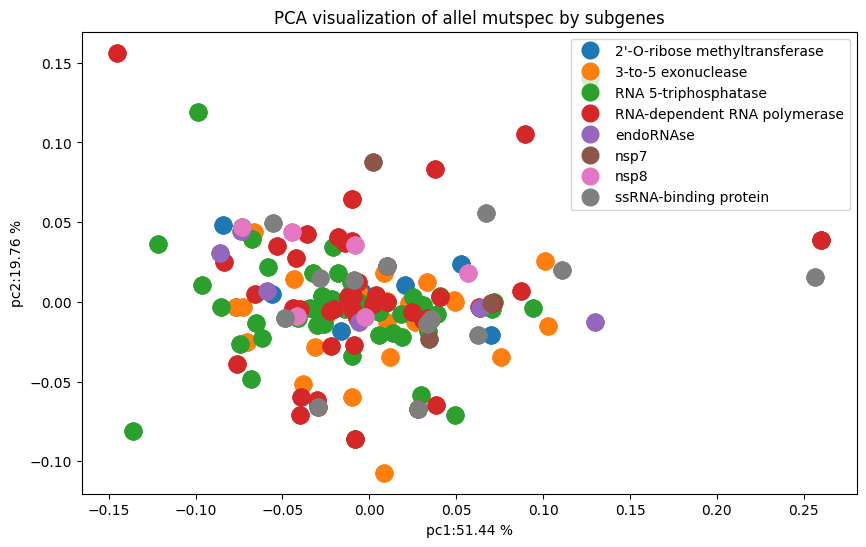

In [122]:
groups = pca_data1.groupby('subgene')
plt.figure(figsize=(10,6))
for name, group in groups:
    plt.plot(group.pc1, group.pc2, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

#plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=allel_char)
plt.title("PCA visualization of allel mutspec by subgenes")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

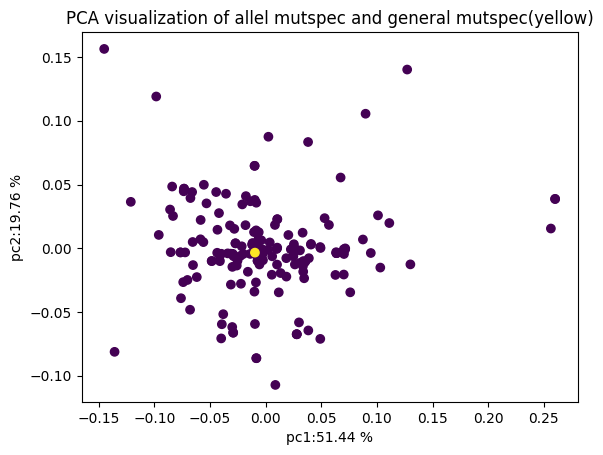

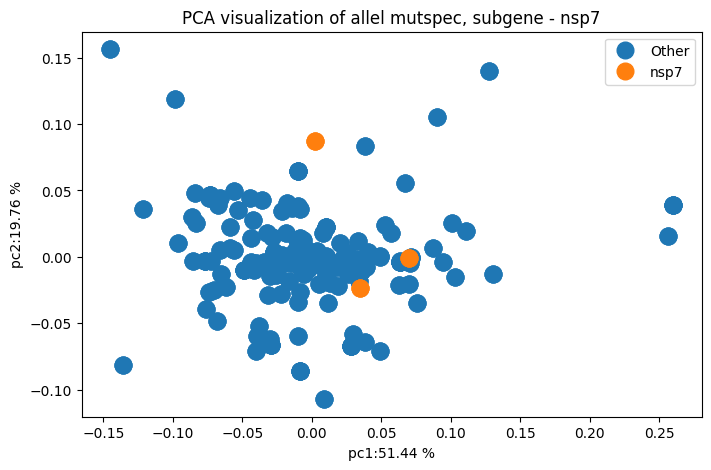

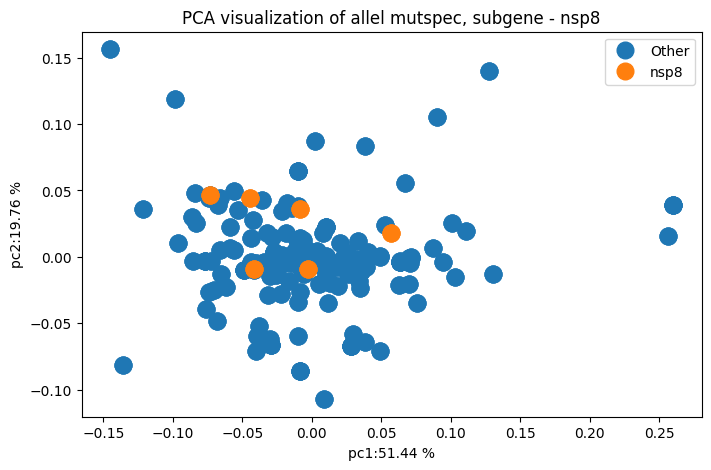

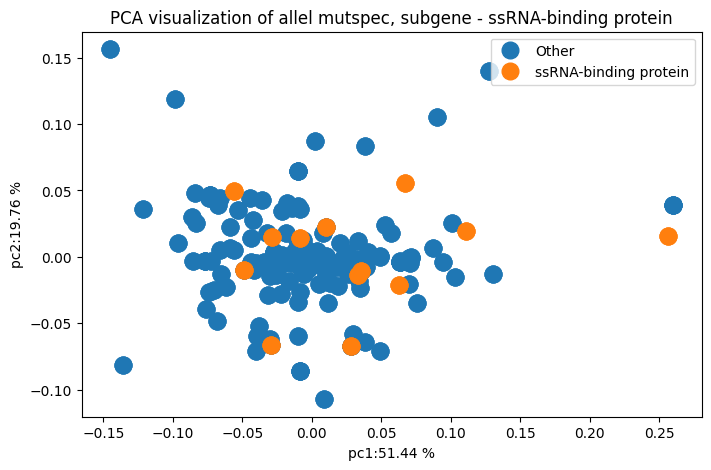

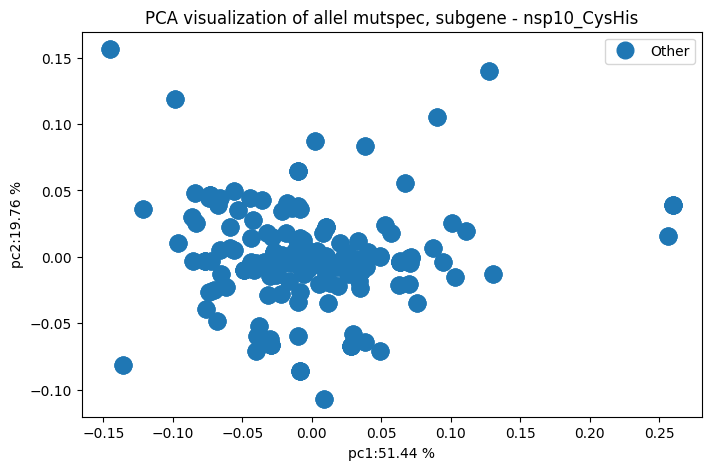

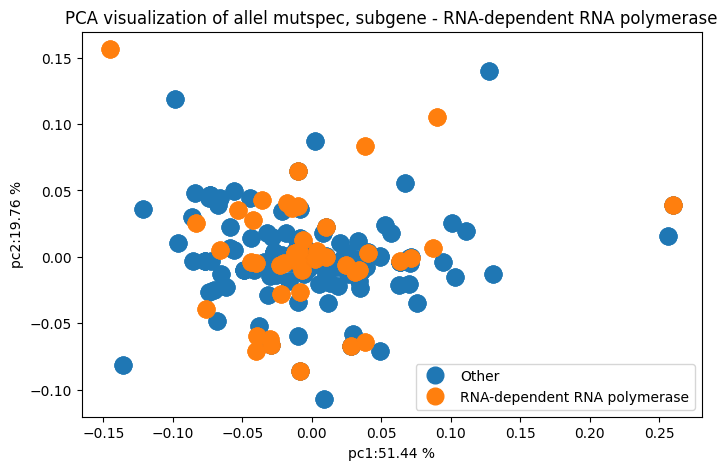

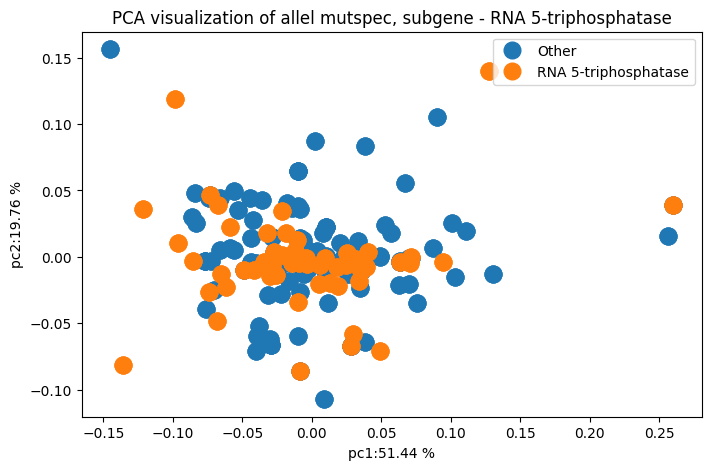

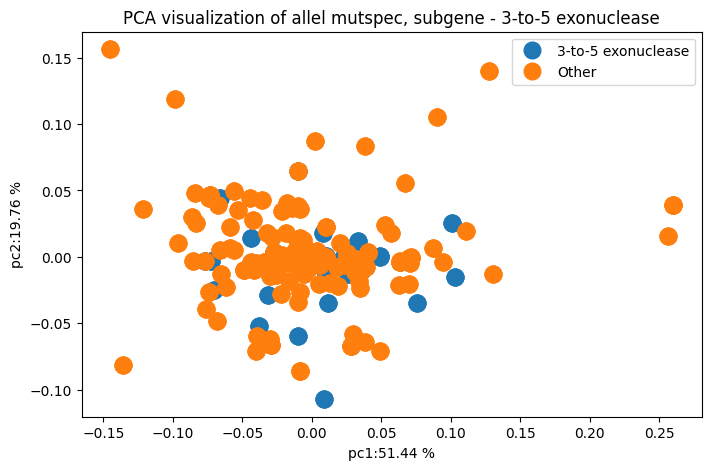

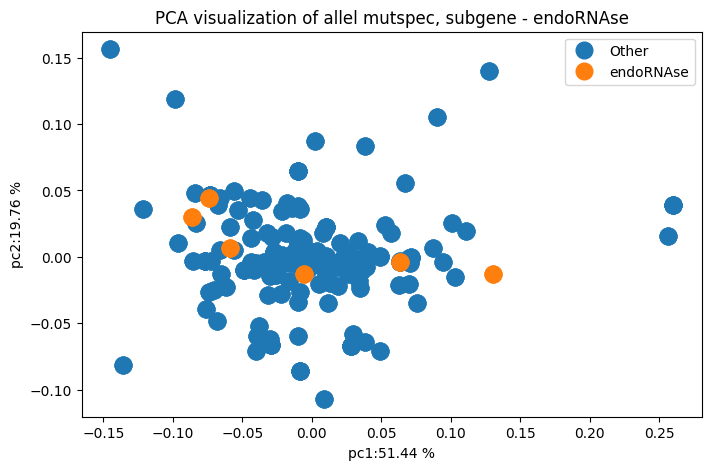

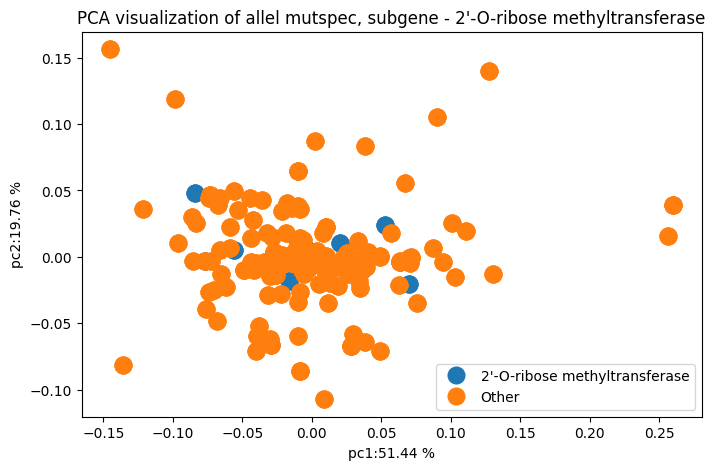

In [127]:
for subgene in _subgenes:
    one_gen = pca_data1.copy()
    one_gen.loc[one_gen['subgene'] != subgene,'subgene'] = 'Other'
    groups = one_gen.groupby('subgene')
    plt.figure(figsize=(8,5))
    for name, group in groups:
        plt.plot(group.pc1, group.pc2, marker='o', linestyle='', markersize=12, label=name)

    plt.legend()

    #plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=allel_char)
    plt.title("PCA visualization of allel mutspec, subgene - "+subgene)
    plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
    plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
    plt.show()
    plt.close()

## Color by number of mutations

In [128]:
mut_num_df = mut_alleles.drop('al_stnum', axis=1)

In [138]:
mut_num_df['sum_mutations'].min()

202

<Axes: >

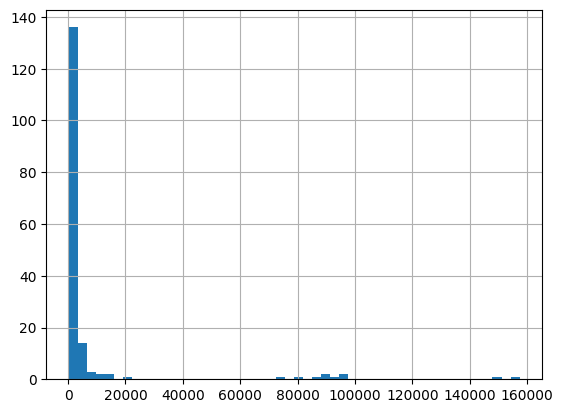

In [136]:
mut_num_df['sum_mutations'].hist(bins=50)

<Axes: >

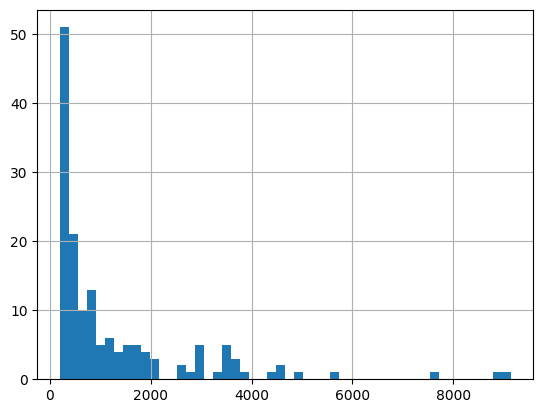

In [137]:
mut_num_df[mut_num_df['sum_mutations']<10000]['sum_mutations'].hist(bins=50)

In [145]:
mut_num_df.loc[mut_num_df['sum_mutations'] < 2000, 'num_mut_group'] = '200-2000'
mut_num_df.loc[(mut_num_df['sum_mutations'] >= 2000) & (mut_num_df['sum_mutations'] < 60000), 'num_mut_group'] = '2000-60000'
mut_num_df.loc[(mut_num_df['sum_mutations'] >= 60000) & (mut_num_df['sum_mutations'] < 120000), 'num_mut_group'] = '6000-120000'
mut_num_df.loc[mut_num_df['sum_mutations'] >= 120000, 'num_mut_group'] = '120000+'

In [141]:
mut_num_df

,allel,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,sum_mutations,num_mut_group
0,3884Leu,0.022140,0.059963,0.007380,0.012915,0.000000,0.299815,0.063653,0.000000,0.121771,0.005535,0.308118,0.098708,1084,200-2000
0,5006Tyr,0.011538,0.038462,0.011538,0.015385,0.007692,0.288462,0.134615,0.007692,0.069231,0.000000,0.384615,0.030769,260,200-2000
0,6773Met,0.003442,0.058520,0.013769,0.001721,0.000000,0.383821,0.048193,0.000000,0.041308,0.008606,0.409639,0.030981,581,200-2000
0,5489Tyr,0.009881,0.052372,0.012846,0.009881,0.004941,0.326087,0.061265,0.005929,0.103755,0.021739,0.321146,0.070158,1012,200-2000
0,5064Ser,0.007435,0.111524,0.014870,0.007435,0.000000,0.427509,0.055762,0.003717,0.011152,0.014870,0.323420,0.022305,269,200-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4620Leu,0.006657,0.068452,0.012140,0.006187,0.000940,0.377976,0.069706,0.000940,0.035479,0.011200,0.377193,0.033130,12768,2000-60000
0,4620Leu,0.008230,0.076132,0.008230,0.008230,0.000000,0.341564,0.082305,0.000000,0.020576,0.030864,0.407407,0.016461,486,200-2000
0,4620Leu,0.007722,0.092664,0.000000,0.011583,0.000000,0.335907,0.077220,0.000000,0.042471,0.007722,0.382239,0.042471,259,200-2000
0,4620Leu,0.008889,0.053333,0.017778,0.000000,0.000000,0.422222,0.053333,0.000000,0.062222,0.013333,0.333333,0.035556,225,200-2000


In [151]:
df_for_plot = mut_num_df.drop(['sum_mutations', 'allel'], axis=1)
mut_char = df_for_plot['num_mut_group']
pca_data_only = df_for_plot.drop('num_mut_group', axis=1)

In [154]:
pca = PCA()
pca_data = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])
pca_data1 = pca_data[["pc1","pc2"]].copy()
pca_data1['num_mut_group'] = list(mut_char)

In [155]:
_mut_num= ['200-2000', '2000-60000', '6000-120000', '120000+']

In [156]:
pca_data1

,pc1,pc2,num_mut_group
0,0.070134,-0.000772,200-2000
1,0.038014,0.083322,200-2000
2,-0.058704,0.007006,200-2000
3,0.038731,-0.007796,200-2000
4,-0.008479,-0.086241,200-2000
...,...,...,...
163,-0.022845,-0.006029,2000-60000
164,-0.017876,0.040873,200-2000
165,0.010345,0.022758,200-2000
166,-0.029302,-0.066225,200-2000


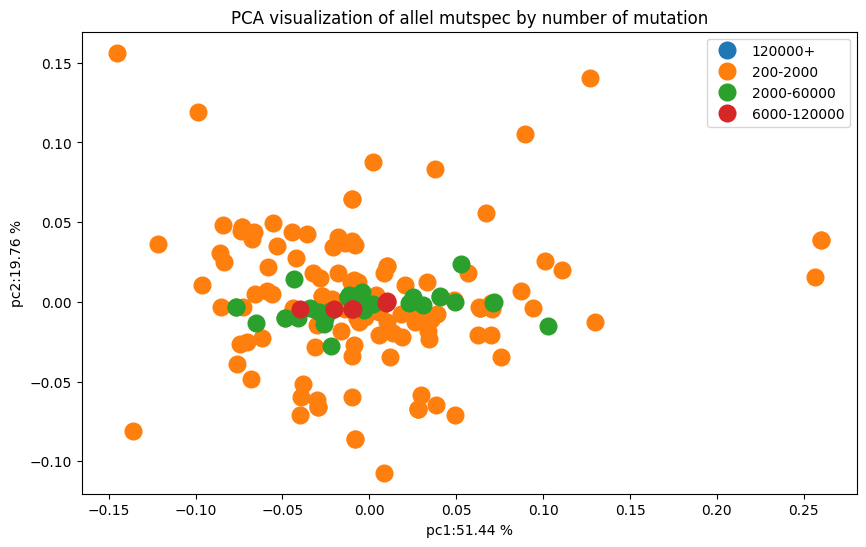

In [157]:
groups = pca_data1.groupby('num_mut_group')
plt.figure(figsize=(10,6))
for name, group in groups:
    plt.plot(group.pc1, group.pc2, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

#plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=allel_char)
plt.title("PCA visualization of allel mutspec by number of mutation")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

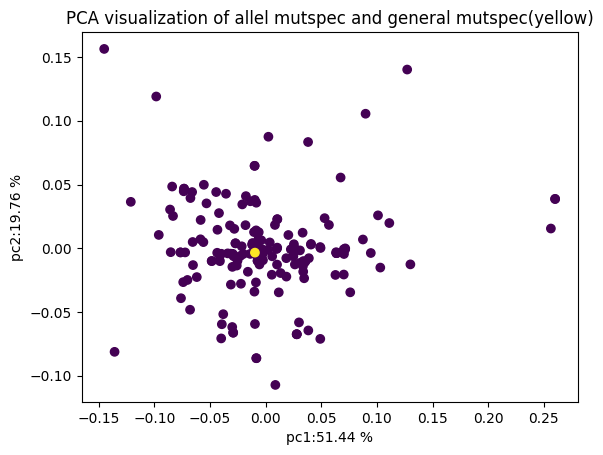